In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("exports/final_model_dataset.csv")
df = df.dropna().reset_index(drop=True)

In [3]:
print(df.notna().any().any())

True


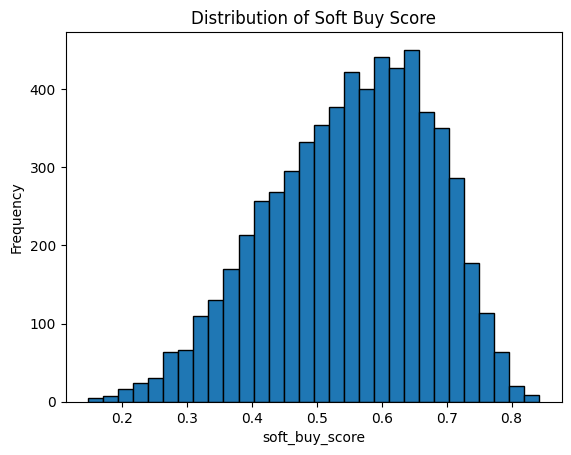

In [4]:
plt.hist(df['soft_buy_score'], bins=30, edgecolor='black')
plt.title('Distribution of Soft Buy Score')
plt.xlabel('soft_buy_score')
plt.ylabel('Frequency')
plt.show()

In [5]:
row_index = 0
for col in df.columns:
    print(f"{col}: {df.iloc[row_index][col]}")


year: 2014.0
selling_price: 450000.0
km_driven: 145500.0
seats: 5.0
mileage_val: 23.4
engine_cc: 1248.0
power_bhp: 74.0
torque_nm: 190.0
torque_rpm: 2000.0
fuel_CNG: 0.0
fuel_Diesel: 1.0
fuel_LPG: 0.0
fuel_Petrol: 0.0
seller_type_Dealer: 0.0
seller_type_Individual: 1.0
seller_type_Trustmark Dealer: 0.0
transmission_Automatic: 0.0
transmission_Manual: 1.0
owner_First: 1.0
owner_Second: 0.0
owner_TestDrive: 0.0
owner_Third+: 0.0
make_Ambassador: 0.0
make_Ashok: 0.0
make_Audi: 0.0
make_BMW: 0.0
make_Chevrolet: 0.0
make_Daewoo: 0.0
make_Datsun: 0.0
make_Fiat: 0.0
make_Force: 0.0
make_Ford: 0.0
make_Honda: 0.0
make_Hyundai: 0.0
make_Isuzu: 0.0
make_Jaguar: 0.0
make_Jeep: 0.0
make_Kia: 0.0
make_Land Rover: 0.0
make_Lexus: 0.0
make_MG: 0.0
make_Mahindra: 0.0
make_Maruti: 1.0
make_Mercedes-Benz: 0.0
make_Mitsubishi: 0.0
make_Nissan: 0.0
make_Opel: 0.0
make_Peugeot: 0.0
make_Renault: 0.0
make_Skoda: 0.0
make_Tata: 0.0
make_Toyota: 0.0
make_Volkswagen: 0.0
make_Volvo: 0.0
soft_buy_score: 0.49752

In [6]:
X = df.drop(columns=['good_buy', 'soft_buy_score'])
y = df['soft_buy_score']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.0005
R² Score: 0.9673


In [10]:
joblib.dump(model, 'classification_model.pkl')

print("✅ Model saved as 'soft_buy_score_model.pkl'")

✅ Model saved as 'soft_buy_score_model.pkl'


In [11]:
# Build a sample with the same features used for training
sample = df.drop(columns=['soft_buy_score', 'good_buy'], errors='ignore').iloc[[0]]

# Real target value
real_value = df.loc[df.index[0], 'soft_buy_score']  # or: df.iloc[0]['soft_buy_score']

# Predict
predicted_value = model.predict(sample)[0]

print(f"Real soft_buy_score:      {real_value:.4f}")
print(f"Predicted soft_buy_score: {predicted_value:.4f}")


Real soft_buy_score:      0.4975
Predicted soft_buy_score: 0.4931


In [12]:
loaded_model = joblib.load('classification_model.pkl')
print("✅ Model loaded successfully!")

# Build a sample with the same features used for training
sample = df.drop(columns=['soft_buy_score', 'good_buy'], errors='ignore').iloc[[0]]

# Real target value
real_value = df.loc[df.index[0], 'soft_buy_score']  # or: df.iloc[0]['soft_buy_score']

# Predict
predicted_value = loaded_model.predict(sample)[0]

print(f"Real soft_buy_score:      {real_value:.4f}")
print(f"Predicted soft_buy_score: {predicted_value:.4f}")

✅ Model loaded successfully!
Real soft_buy_score:      0.4975
Predicted soft_buy_score: 0.4931
